# Análise Gráfica das implementações da Mochila (Knapsack)

<em>Feito por <b>Lucas Guerreiro Pellegrini</b></em>
<em> e <b>Gabriel Teodoro Ribeiro;</b></em>

<em>Para a disciplina de Análise de Algoritmos.</em>

### Código:

In [1]:
import numpy as np
import math
import tracemalloc
from timeit import default_timer as timer
import matplotlib.pyplot as plt

In [2]:
PESO = 1
VALOR = 0

<h3 align="center"> Implementação Recursiva: </h3>

In [3]:
def mochila_exponencial(k, coisas, n):
    if n == 0:
        if coisas[n][PESO] <= k:
            return coisas[n][VALOR]
        return 0

    valorCom = -1
    if k >= coisas[n][PESO]:
        valorCom = mochila_exponencial(k - coisas[n][PESO], coisas, n - 1) + coisas[n][VALOR]

    valorSem = mochila_exponencial(k, coisas, n - 1)

    return max(valorCom, valorSem)

<h3 align="center"> Implementação Memoizada: </h3>

In [4]:
class MochilaMemo:
    def __init__(self):
        self.dic = {}

    def resolve(self, k, coisas, n):
        if n == 0:
            if coisas[n][PESO] <= k:
                return coisas[n][VALOR]
            return 0

        if (n, k) in self.dic:
            return self.dic[(n, k)]

        # Calcula o possível valor sem o elemento
        valorSem = self.resolve(k, coisas, n - 1)

        # Calcula o possível valor com o elemento
        if k >= coisas[n][PESO]:
            valorCom = self.resolve(k - coisas[n][PESO], coisas, n - 1) + coisas[n][VALOR]
            self.dic[(n, k)] = max(valorCom, valorSem)
        # Se não cabe, é sem mesmo
        else:
            self.dic[(n, k)] = valorSem

        return self.dic[(n, k)]

<h3 align="center"> Implementação com Programação Dinâmica: </h3>

In [5]:
class MochilaPD:
    def __init__(self):
        self.matriz = [[]]
        self.resposta = -1

    def resolve(self, k, coisas):
        self.matriz = np.zeros((len(coisas), k+1))

        for i in range(len(coisas)):
            for c in range(0, k+1):
                if coisas[i - 1][PESO] > c:
                    self.matriz[i][c] = self.matriz[i - 1][c]
                else:
                    menorSem = self.matriz[i - 1][c]
                    menorCom = self.matriz[i - 1][c - coisas[i - 1][PESO]] + coisas[i - 1][VALOR]
                    self.matriz[i][c] = max(menorSem, menorCom)

        self.acha_maior()

    def acha_maior(self):
        for linha in self.matriz:
            for elem in linha:
                if elem > self.resposta:
                    self.resposta = elem

<h3 align="center"> Implementação Aproximada (IK): </h3>

In [6]:
class MochilaA:
    def __init__(self):
        self.matriz = [[]]
        self.resposta = -1

    def resolve(self, k, coisas, epsilon = 0.15):
        coisas = self.pre_processamento_IK(k, coisas, epsilon)

        self.matriz = np.zeros((len(coisas), k+1))

        for i in range(len(coisas)):
            for c in range(0, k+1):
                if coisas[i - 1][PESO] > c:
                    self.matriz[i][c] = self.matriz[i - 1][c]
                else:
                    menorSem = self.matriz[i - 1][c]
                    menorCom = self.matriz[i - 1][c - coisas[i - 1][PESO]] + coisas[i - 1][VALOR]
                    self.matriz[i][c] = max(menorSem, menorCom)

        self.acha_maior()

    def acha_maior(self):
        for linha in self.matriz:
            for elem in linha:
                if elem > self.resposta:
                    self.resposta = elem

    def pre_processamento_IK(self, k, coisas, epsilon):
        # Remove elementos com peso maior que a capacidade
        coisas[:] = [x for x in coisas if x[PESO] <= k]

        # IBARRA-KIM
        sigma = max(coisas)[VALOR]
        #epsilon = np.random.ranf()
        print(f"\u03B5 = {epsilon}")
        lmbd = (epsilon * sigma) / (len(coisas)-1)

        u = []
        for valor, peso in coisas:
            u.append(tuple((int(math.floor(valor/lmbd)), peso)))
            
        return u

<h2><center> Testes: </center></h2>

In [7]:
lista_coisas = [(10, 5), (40, 4), (30, 6), (50, 3)]
lista_coisas2 = [(10, 5), (40, 4), (30, 6), (50, 3), (15, 5), (26, 4), (21, 6), (17, 3), (12, 2), (24, 3), (22, 6),
                     (21, 3), (18, 2), (36, 4), (55, 9), (60, 7), (35, 6), (25, 12), (80, 9), (55, 15), (40, 15),
                     (79, 19), (99, 25)]
lista_coisas3 = [(10, 5), (40, 4), (30, 6), (50, 3), (15, 5), (26, 4), (21, 6), (17, 3), (12, 2), (24, 3), (22, 6),
                     (21, 3), (18, 2), (36, 4), (55, 9), (60, 7), (35, 6), (25, 12), (80, 9), (55, 15), (40, 15),
                     (79, 19), (99, 25), (100, 28), (105, 30), (110, 30), (112, 29), (120, 32), (124, 33), (130, 40),
                     (131, 31), (129, 46), (150, 40), (155, 45), (170, 60), (169, 58)]
lista_coisas4 = [(10, 5), (40, 4), (30, 6), (50, 3), (15, 5), (26, 4), (21, 6), (17, 3), (12, 2), (24, 3), (22, 6),
                     (21, 3), (18, 2), (36, 4), (55, 9), (60, 7), (35, 6), (25, 12), (80, 9), (55, 15), (40, 15),
                     (79, 19), (99, 25), (100, 28), (105, 30), (110, 30), (112, 29), (120, 32), (124, 33), (130, 40),
                     (131, 31), (129, 46), (150, 40), (155, 45), (170, 60), (169, 58), (170, 60), (170, 60), (180, 65),
                     (181, 62), (185, 70), (190, 80), (199, 85), (185, 75), (200, 100), (210, 105), (220, 106), (250, 120)]

<div class="alert alert-block alert-warning"><b>Sobre os testes: </b> Os testes consistem em executar o algoritmo com as mesmas entradas; sendo elas as 4 listas "lista_coisasX" e suas respectivas capacidades: 15, 40, 100, 130 </div>

<h4><center> Teste 1: </center></h4>

###### Algoritmo Recursivo:

In [8]:
tracemalloc.start()
start = timer()

resultado = mochila_exponencial(15, lista_coisas, len(lista_coisas)-1)

end = timer()
_, pico1r = tracemalloc.get_traced_memory()
tracemalloc.stop()

t1r = end - start
print(f"Resultado: {resultado}")
print(f"Tempo gasto: {t1r}s")
print(f"Pico de memória: {pico1r}b")

Resultado: 120
Tempo gasto: 0.00015540000000013876s
Pico de memória: 13081b


###### Algoritmo Memoizado:

In [9]:
mochila = MochilaMemo()
tracemalloc.start()
start = timer()

resultado = mochila.resolve(15, lista_coisas, len(lista_coisas)-1)

end = timer()
_, pico1m = tracemalloc.get_traced_memory()
tracemalloc.stop()

t1m = end - start
print(f"Resultado: {resultado}")
print(f"Tempo gasto: {t1m}s")
print(f"Pico de memória: {pico1m}b")

Resultado: 120
Tempo gasto: 0.00016160000000020602s
Pico de memória: 13777b


###### Algoritmo de Programação Dinâmica:

In [10]:
mochila = MochilaPD()
tracemalloc.start()
start = timer()

mochila.resolve(15, lista_coisas)

end = timer()
_, pico1p = tracemalloc.get_traced_memory()
tracemalloc.stop()

t1p = end - start
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t1p}s")
print(f"Pico de memória: {pico1p}b")

Resultado: 120.0
Tempo gasto: 0.0005406999999997275s
Pico de memória: 13153b


###### Algoritmo de Aproximação:

In [11]:
mochila = MochilaA()
tracemalloc.start()
start = timer()

mochila.resolve(15, lista_coisas)

end = timer()
_, pico1a = tracemalloc.get_traced_memory()
tracemalloc.stop()

t1a = end - start
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t1a}s")
print(f"Pico de memória: {pico1a}b")

ε = 0.15
Resultado: 48.0
Tempo gasto: 0.001395500000000105s
Pico de memória: 161784b


<h4><center> Teste 2: </center></h4>

###### Algoritmo Recursivo:

In [12]:
tracemalloc.start()
start = timer()

resultado = mochila_exponencial(40, lista_coisas2, len(lista_coisas2)-1)

end = timer()
_, pico2r = tracemalloc.get_traced_memory()
tracemalloc.stop()

t2r = end - start
print(f"Resultado: {resultado}")
print(f"Tempo gasto: {t2r}s")
print(f"Pico de memória: {pico2r}b")

Resultado: 358
Tempo gasto: 0.25971199999999994s
Pico de memória: 171083b


###### Algoritmo Memoizado:

In [13]:
mochila = MochilaMemo()
tracemalloc.start()
start = timer()

resultado = mochila.resolve(40, lista_coisas2, len(lista_coisas2)-1)

end = timer()
_, pico2m = tracemalloc.get_traced_memory()
tracemalloc.stop()

t2m = end - start
print(f"Resultado: {resultado}")
print(f"Tempo gasto: {t2m}s")
print(f"Pico de memória: {pico2m}b")

Resultado: 358
Tempo gasto: 0.0018913000000000402s
Pico de memória: 40906b


###### Algoritmo de Programação Dinâmica:

In [14]:
mochila = MochilaPD()
tracemalloc.start()
start = timer()

mochila.resolve(40, lista_coisas2)

end = timer()
_, pico2p = tracemalloc.get_traced_memory()
tracemalloc.stop()

t2p = end - start
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t2p}s")
print(f"Pico de memória: {pico2p}b")

Resultado: 358.0
Tempo gasto: 0.006382899999999747s
Pico de memória: 18809b


###### Algoritmo de Aproximação:

In [15]:
mochila = MochilaA()
tracemalloc.start()
start = timer()

mochila.resolve(40, lista_coisas2)

end = timer()
_, pico2a = tracemalloc.get_traced_memory()
tracemalloc.stop()

t2a = end - start
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t2a}s")
print(f"Pico de memória: {pico2a}b")

ε = 0.15
Resultado: 526.0
Tempo gasto: 0.0064462000000000685s
Pico de memória: 168518b


<h4><center> Teste 3: </center></h4>

###### Algoritmo Recursivo:

In [16]:
tracemalloc.start()
start = timer()

resultado = mochila_exponencial(100, lista_coisas3, len(lista_coisas3)-1)

end = timer()
_, pico3r = tracemalloc.get_traced_memory()
tracemalloc.stop()

t3r = end - start
print(f"Resultado: {resultado}")
print(f"Tempo gasto: {t3r}s")
print(f"Pico de memória: {pico3r}b")

Resultado: 645
Tempo gasto: 31.3377178s
Pico de memória: 167574b


###### Algoritmo Memoizado:

In [17]:
mochila = MochilaMemo()
tracemalloc.start()
start = timer()

resultado = mochila.resolve(100, lista_coisas3, len(lista_coisas3)-1)

end = timer()
_, pico3m = tracemalloc.get_traced_memory()
tracemalloc.stop()

t3m = end - start
print(f"Resultado: {resultado}")
print(f"Tempo gasto: {t3m}s")
print(f"Pico de memória: {pico3m}b")

Resultado: 645
Tempo gasto: 0.006835600000002273s
Pico de memória: 151009b


###### Algoritmo de Programação Dinâmica:

In [18]:
mochila = MochilaPD()
tracemalloc.start()
start = timer()

mochila.resolve(100, lista_coisas3)

end = timer()
_, pico3p = tracemalloc.get_traced_memory()
tracemalloc.stop()

t3p = end - start
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t3p}s")
print(f"Pico de memória: {pico3p}b")

Resultado: 645.0
Tempo gasto: 0.0224347999999992s
Pico de memória: 187936b


###### Algoritmo de Aproximação:

In [19]:
mochila = MochilaA()
tracemalloc.start()
start = timer()

mochila.resolve(100, lista_coisas3)

end = timer()
_, pico3a = tracemalloc.get_traced_memory()
tracemalloc.stop()

t3a = end - start
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t3a}s")
print(f"Pico de memória: {pico3a}b")

ε = 0.15
Resultado: 877.0
Tempo gasto: 0.02246290000000073s
Pico de memória: 189178b


<h4><center> Teste 4: </center></h4>

###### Algoritmo Recursivo:

In [20]:
tracemalloc.start()
start = timer()

resultado = mochila_exponencial(130, lista_coisas4, len(lista_coisas4)-1)

end = timer()
_, pico4r = tracemalloc.get_traced_memory()
tracemalloc.stop()

t4r = end - start
print(f"Resultado: {resultado}")
print(f"Tempo gasto: {t4r}s")
print(f"Pico de memória: {pico4r}b")

Resultado: 769
Tempo gasto: 178.70858339999998s
Pico de memória: 178176b


###### Algoritmo Memoizado:

In [21]:
mochila = MochilaMemo()
tracemalloc.start()
start = timer()

resultado = mochila.resolve(130, lista_coisas4, len(lista_coisas4)-1)

end = timer()
_, pico4m = tracemalloc.get_traced_memory()
tracemalloc.stop()

t4m = end - start
print(f"Resultado: {resultado}")
print(f"Tempo gasto: {t4m}s")
print(f"Pico de memória: {pico4m}b")

Resultado: 769
Tempo gasto: 0.012683699999996634s
Pico de memória: 305445b


###### Algoritmo de Programação Dinâmica:

In [22]:
mochila = MochilaPD()
tracemalloc.start()
start = timer()

mochila.resolve(130, lista_coisas4)

end = timer()
_, pico4p = tracemalloc.get_traced_memory()
tracemalloc.stop()

t4p = end - start
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t4p}s")
print(f"Pico de memória: {pico4p}b")

Resultado: 769.0
Tempo gasto: 0.03366089999997257s
Pico de memória: 62001b


###### Algoritmo de Aproximação:

In [23]:
mochila = MochilaA()
tracemalloc.start()
start = timer()

mochila.resolve(130, lista_coisas4)

end = timer()
_, pico4a = tracemalloc.get_traced_memory()
tracemalloc.stop()

t4a = end - start
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t4a}s")
print(f"Pico de memória: {pico4a}b")

ε = 0.15
Resultado: 957.0
Tempo gasto: 0.03553740000000971s
Pico de memória: 210823b


<h2><center> Análise Gráfica e Conclusão: </center></h2>

<div class="alert alert-block alert-warning"><b>Sobre o tamanho da entrada: </b> Como a entrada consiste de dois elementos (a lista de coisas e a capacidade da mochila), consideraremos como tamanho de entrada cada um dos 4 testes. </div>

<h3><center> Testes Individuais: </center></h3>

### Crescimento do Algoritmo Recursivo, de acordo com o crescimento da entrada:

###### Memória:

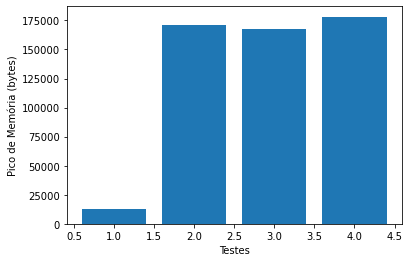

In [36]:
plt.bar([1, 2, 3, 4], [pico1r, pico2r, pico3r, pico4r])
plt.ylabel('Pico de Memória (bytes)')
plt.xlabel('Testes')
plt.show()

Houve um crescimento notável no terceiro e quarto teste, onde não só o tamanho da lista de coisas cresce, mas também a capacidade da mochila, o que faz com que a pilha de recursão cresca considerávelmente.

###### Tempo:

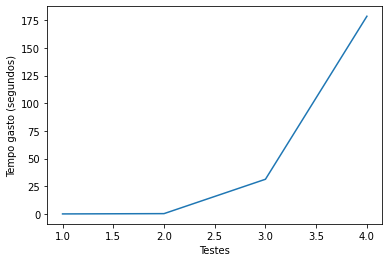

In [25]:
plt.plot([1, 2, 3, 4], [t1r, t2r, t3r, t4r])
plt.ylabel('Tempo gasto (segundos)')
plt.xlabel('Testes')
plt.show()

É insteressante notar que, mesmo no o terceiro teste, o tempo é próximo do tempo nos testes 1 e 2. É só no quarto e maior teste que o tempo gasto dispara considerávelmente, o que exemplifica a característica do custo exponencial do algoritmo.

### Crescimento do Algoritmo Memoizado, de acordo com o crescimento da entrada:

###### Memória:

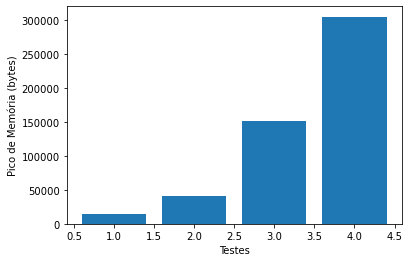

In [37]:
plt.bar([1, 2, 3, 4], [pico1m, pico2m, pico3m, pico4m])
plt.ylabel('Pico de Memória (bytes)')
plt.xlabel('Testes')
plt.show()

Houve um salto tão grande no quarto teste (67513727b apresentados em uma das execuções), que é difícil comparar com os outros. Ainda, é de se esperaro que custo em memória desse algoritmo seja, naturalmente, muito mais alto que o dos outros, por conta da estrutura de dados "dicionário".

###### Tempo:

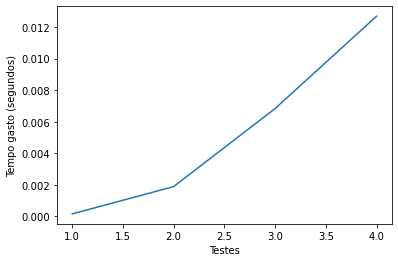

In [27]:
plt.plot([1, 2, 3, 4], [t1m, t2m, t3m, t4m])
plt.ylabel('Tempo gasto (segundos)')
plt.xlabel('Testes')
plt.show()

O algoritmo apresenta um crescimento brando e quase linear para os três primeiros testes. Entretanto, no teste 4 o tempo consumido é astronomicamente maior,

### Crescimento do Algoritmo de Programação Dinâmica, de acordo com o crescimento da entrada:

###### Memória:

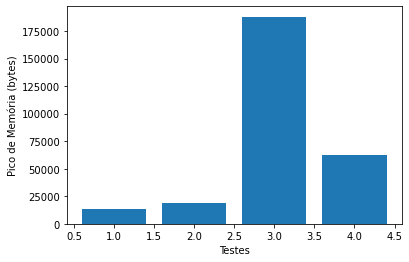

In [35]:
plt.bar([1, 2, 3, 4], [pico1p, pico2p, pico3p, pico4p])

plt.ylabel('Pico de Memória (bytes)')
plt.xlabel('Testes')
plt.show()

Houve um crescimento notável no quarto teste

###### Tempo:

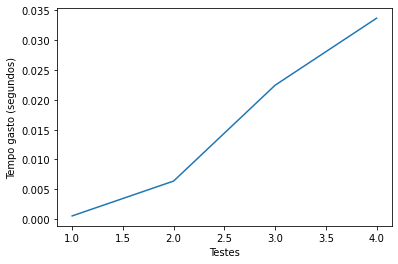

In [29]:
plt.plot([1, 2, 3, 4], [t1p, t2p, t3p, t4p])
plt.ylabel('Tempo gasto (segundos)')
plt.xlabel('Testes')
plt.show()

Conclusao

### Crescimento do Algoritmo de Aproximação, de acordo com o crescimento da entrada:

###### Memória:

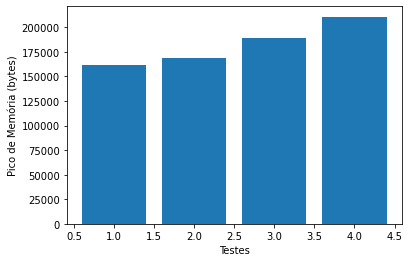

In [38]:
plt.bar([1, 2, 3, 4], [pico1a, pico2a, pico3a, pico4a])
plt.ylabel('Pico de Memória (bytes)')
plt.xlabel('Testes')
plt.show()

Houve um crescimento notável no quarto teste

###### Tempo:

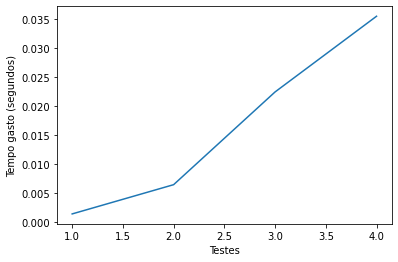

In [31]:
plt.plot([1, 2, 3, 4], [t1a, t2a, t3a, t4a])
plt.ylabel('Tempo gasto (segundos)')
plt.xlabel('Testes')
plt.show()

Conclusao

<h3><center> Testes Coletivos: </center></h3>

## Comparativo 1

###  Análise de Tempo e Memória em detrimento do tamanho da entrada para os três primeiros algoritmos.

<h3><center> Teste 1: </center></h3>

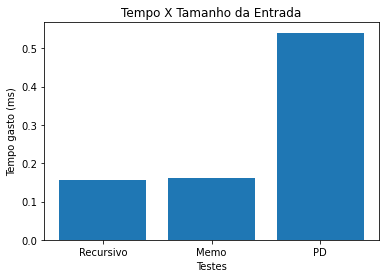

In [41]:
plt.bar(['Recursivo', 'Memo', 'PD'], [t1r*1000, t1m*1000, t1p*1000])
plt.ylabel('Tempo gasto (ms)')
plt.xlabel('Testes')
plt.title('Tempo X Tamanho da Entrada')
plt.show()

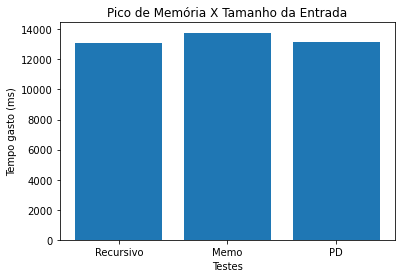

In [42]:
plt.bar(['Recursivo', 'Memo', 'PD'], [pico1r, pico1m, pico1p])
plt.ylabel('Memória em bytes')
plt.xlabel('Testes')
plt.title('Pico de Memória X Tamanho da Entrada')
plt.show()

<h4><center> Conclusão: </center></h4>

<h3><center> Teste 2: </center></h3>

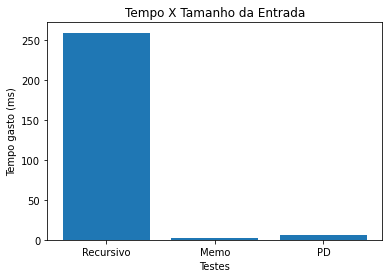

In [43]:
plt.bar(['Recursivo', 'Memo', 'PD'], [t2r*1000, t2m*1000, t2p*1000])
plt.ylabel('Tempo gasto (ms)')
plt.xlabel('Testes')
plt.title('Tempo X Tamanho da Entrada')
plt.show()

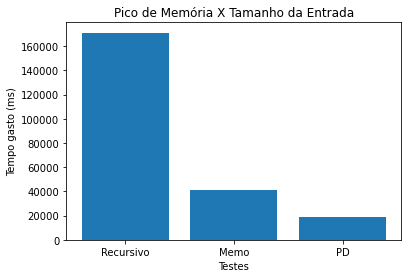

In [44]:
plt.bar(['Recursivo', 'Memo', 'PD'], [pico2r, pico2m, pico2p])
plt.ylabel('Memória em bytes')
plt.xlabel('Testes')
plt.title('Pico de Memória X Tamanho da Entrada')
plt.show()

<h4><center> Conclusão: </center></h4>

<h3><center> Teste 3: </center></h3>

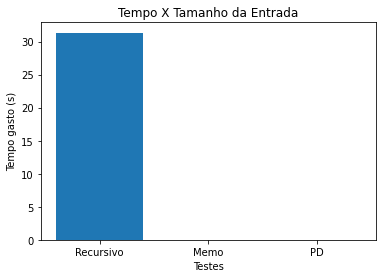

In [45]:
plt.bar(['Recursivo', 'Memo', 'PD'], [t3r, t1m, t1p])
plt.ylabel('Tempo gasto (s)')
plt.xlabel('Testes')
plt.title('Tempo X Tamanho da Entrada')
plt.show()

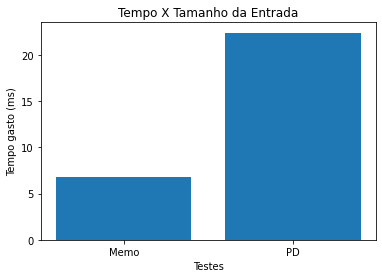

In [50]:
plt.bar(['Memo', 'PD'], [t3m*1000, t3p*1000])
plt.ylabel('Tempo gasto (ms)')
plt.xlabel('Testes')
plt.title('Tempo X Tamanho da Entrada')
plt.show()

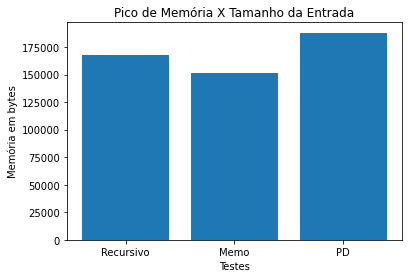

In [48]:
plt.bar(['Recursivo', 'Memo', 'PD'], [pico3r, pico3m, pico3p])
plt.ylabel('Memória em bytes')
plt.xlabel('Testes')
plt.title('Pico de Memória X Tamanho da Entrada')
plt.show()

<h4><center> Conclusão: </center></h4>

<h3><center> Teste 4: </center></h3>

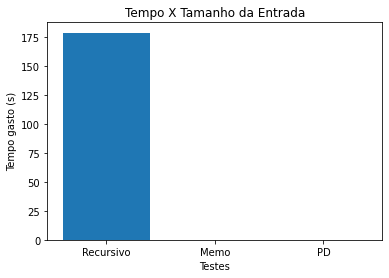

In [49]:
plt.bar(['Recursivo', 'Memo', 'PD'], [t4r, t4m, t4p])
plt.ylabel('Tempo gasto (s)')
plt.xlabel('Testes')
plt.title('Tempo X Tamanho da Entrada')
plt.show()

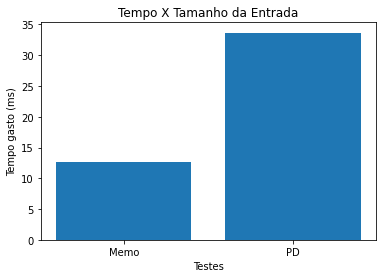

In [51]:
plt.bar(['Memo', 'PD'], [t4m*1000, t4p*1000])
plt.ylabel('Tempo gasto (ms)')
plt.xlabel('Testes')
plt.title('Tempo X Tamanho da Entrada')
plt.show()

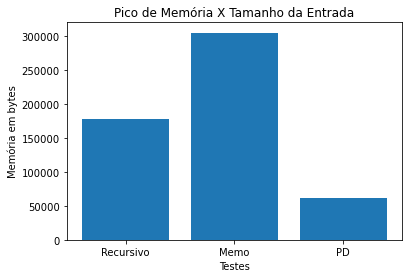

In [52]:
plt.bar(['Recursivo', 'Memo', 'PD'], [pico4r, pico4m, pico4p])
plt.ylabel('Memória em bytes')
plt.xlabel('Testes')
plt.title('Pico de Memória X Tamanho da Entrada')
plt.show()

<h4><center> Conclusão: </center></h4>

### Conclusão do Comparativo 1:

## Comparativo 2

<h2><center> Testes de Corretude: </center></h2>

<div class="alert alert-block alert-warning"><b>Metodologia: </b> Os testes consistem em executar os algoritmos de Programação Dinâmica e de Aproximação com a mesma entrada (a maior entrada utilizda nos testes), e então avaliar, dentre outras coisas, a corretude da aproximação ao variar o valor de "ε"</div>

<h4><center> ε = 0,2 </center></h4>

<h4><center> ε = 0,4 </center></h4>

<h4><center> ε = 0,6 </center></h4>

<h4><center> ε = 0,8 </center></h4>

<h4><center> ε = 1 </center></h4>

### Conclusão do Comparativo 1: